# Исследование объявлений о продаже квартир

Проект подразумевает создание калькулятора для оценки стоимости недвижимости в Санкт-Петербурге по данным Яндекс недвижимости и Москве по дпнным из Kaggle.

### Изучение общей информации. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

0

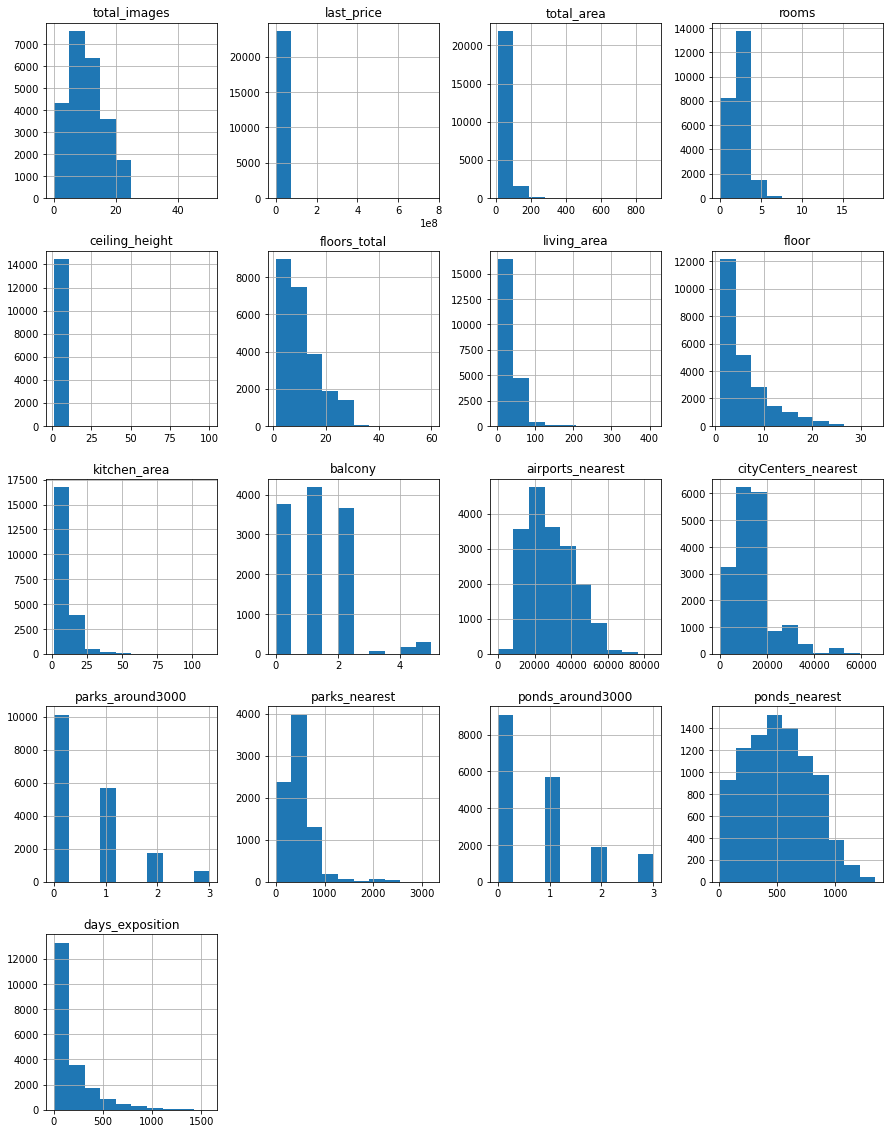

In [4]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv('C:/Users/Bulat/Desktop/Всё для проектов/Данные недвижка/real_estate_data.csv', encoding='utf-8', sep='	')
print(data.info())
print(data.hist(figsize=(15,20)))
data.duplicated().sum()

Достаточно много пропусков

### Предобработка данных

In [5]:
data['balcony'] = data['balcony'].fillna(0)
data['floors_total'] = data['floors_total'].fillna(1)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64


Для начало выведем и найдём все пропуски. Затем начинаем заменять пропуски:
- В категории "балконы" скорее всего нет балкона
- В категории "Количество этажей скорее всего равно 1
- В категории "Количество парков" и "Количество прудов" тоже скорее всего нет

Остальные не могут быть заменены, так как:
- "высота потолка" и "жилая площадь" и "площадь кухни" - продавцы не знают какой размер или не измеряли
- "аппартаменты" и "ближайший аэропорт" и "дальность аэропорта/парка/пруда" - не знают
- "название города" - не указали
- "days_exposition" - не убрали анкету

Отлично дупликатов не обнаружено!

In [6]:
for i in data:
    print(f'{i} -> {data[i].dtype}')
#first_day_exposition ne data +
#floors_total ne int +
#is_apartment  ne bull +
#balcony ne int +
#parks_around3000 ne int +
#ponds_around3000 ne int +

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['floors_total'] = data['floors_total'].astype('int64')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

total_images -> int64
last_price -> float64
total_area -> float64
first_day_exposition -> object
rooms -> int64
ceiling_height -> float64
floors_total -> float64
living_area -> float64
floor -> int64
is_apartment -> object
studio -> bool
open_plan -> bool
kitchen_area -> float64
balcony -> float64
locality_name -> object
airports_nearest -> float64
cityCenters_nearest -> float64
parks_around3000 -> float64
parks_nearest -> float64
ponds_around3000 -> float64
ponds_nearest -> float64
days_exposition -> float64


Изменены слкдующие столбцы:
- "first_day_exposition" на дату
- "floors_total", "balcony", "parks_around3000", "ponds_around3000" на целое
- "is_apartment" на логическое

In [7]:
data['first_name'] = data['locality_name'].copy()

In [8]:
print(len(data['locality_name'].unique())) #365

for kol in range(7):
    for i in data['locality_name'].unique():
        if str(type(i)) == "<class 'str'>":
            data['locality_name'].loc[data['locality_name'] == i] = i.replace('посёлок','поселок') #331
            data['locality_name'].loc[data['locality_name'] == i] = i.replace('поселок городского типа','поселок') #330
            data['locality_name'].loc[data['locality_name'] == i] = i.replace('деревня','') #330
            data['locality_name'].loc[data['locality_name'] == i] = i.replace('городской поселок','') #329
            data['locality_name'].loc[data['locality_name'] == i] = i.replace('поселок','') #317
            data['locality_name'].loc[data['locality_name'] == i] = i.replace('село','') #316
            data['locality_name'].loc[data['locality_name'] == i] = i.replace('садовое товарищество','')#314
            data['locality_name'].loc[data['locality_name'] == i] = i.replace('садоводческое некоммерческое товарищество','')#314
            data['locality_name'].loc[data['locality_name'] == i] = i.replace('станции','')#314
            data['locality_name'].loc[data['locality_name'] == i] = i.replace('коттеджный','')#314

            if (i[0] == ' '):
                data['locality_name'].loc[data['locality_name'] == i] = i[1:] #308

            
data['locality_name'] = data['locality_name'].replace('поселок городского типа','поселок')
data['locality_name'].sort_values().unique()

365


array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жил', 'Жилгородок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара', 'Ильи

Слишком много похожих названий, легче создать новый столбец с оригиналом и оставить здесь только названия (без "село", "пгт" и т.д.)
Для сайта нужно сделать заполнение по картам, чтобы дом привязывался к конкретному адрессу, а не тому, что напишет человек

In [9]:
for i in data['ceiling_height']:
    if i > 14:
        print(i)
        data['ceiling_height'] = data['ceiling_height'].replace(i, i//10)
        
data['ceiling_height'].unique()

25.0
32.0
25.0
27.0
24.0
27.0
26.0
27.0
25.0
25.0
27.0
25.0
25.0
20.0
27.0
25.0
27.0
22.6
27.5
27.0
32.0
100.0
27.0


array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.  ,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,
        2.66,  2.59,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [10]:
print(data.describe())
print(data['last_price'].min())

data['last_price'].sort_values()
data[data['last_price'] == data['last_price'].min()]['last_price'] = 121900

data.loc[data['last_price']==12190.0]['last_price'] = 121900
data['last_price'].min()

       total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.728814   
std        5.682529  1.088701e+07     35.654083      1.078405        0.320828   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.510000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000       14.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23699.000000  21796.000000  23699.000000  21421.000000  23699.000000   
mean      10.638719     34.457852      5.892358     10.569807      0.591080   
std        6.610834     22.030445

12190.0

Опять же **человеческая** ошибка, которую будет исправлять другой **человек**...)

In [11]:
data.loc[data['last_price'] == 12190, ['last_price']] = 121900

In [12]:
data['last_price'].min()

121900.0

На 2-м шаге было изменено много ошибок, сделанных в основном людьми:
1) Удалены одинаковые деревни поселки с одним названием

2) Заменены размеры потолков

3) Изменены типы данных

### Посчитаны и добавлены в таблицу новые столбцы

In [13]:
data['price/metr'] = data['last_price']/data['total_area']
data['week_day'] = data['first_day_exposition'].dt.dayofweek
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data['km'] = pd.to_numeric(round(data['cityCenters_nearest'] / 1000, 0))

data['type_floor'] = '0'

data['km'] = pd.to_numeric(data['km'], errors='ignore', downcast="integer")
pd.to_numeric(data['km'], errors='ignore', downcast="integer")
data['km'] = data['km'].astype('int', errors='ignore')

#Переводим типы этажей
data['type_floor'].loc[data['floor'] == 1] = 'Первый'
data['type_floor'] = data['type_floor'].where(data['floor'] != data['floors_total'],other='Последний')
data['type_floor'] = data['type_floor'].where(data['type_floor'].isin(['Последний',"Первый"]), other='Другой')
    
print(data['type_floor'].unique())
display(data.head(30))
data
print(data['first_day_exposition'].dt.year)


new_data = data.where(data['type_floor'] =='Первый')
new_data = new_data.dropna()
new_data = data.query('type_floor == "Первый"')
new_data

['Другой' 'Первый' 'Последний']


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,first_name,price/metr,week_day,month,year,km,type_floor
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,2,755.0,NaN,Санкт-Петербург,120370.370370,3,3,2019,16.0,Другой
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,True,...,0,NaN,81.0,посёлок Шушары,82920.792079,1,12,2018,19.0,Первый
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,True,...,2,574.0,558.0,Санкт-Петербург,92785.714286,3,8,2015,14.0,Другой
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,True,...,3,234.0,424.0,Санкт-Петербург,408176.100629,4,7,2015,7.0,Другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,1,48.0,121.0,Санкт-Петербург,100000.000000,1,6,2018,8.0,Другой
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,True,...,0,NaN,55.0,городской посёлок Янино-1,95065.789474,0,9,2018,NaN,Другой
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,True,...,0,NaN,155.0,посёлок Парголово,99195.710456,3,11,2017,19.0,Другой
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,True,...,0,NaN,NaN,Санкт-Петербург,110544.692737,3,4,2019,12.0,Другой
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,True,...,0,NaN,189.0,посёлок Мурино,87454.764777,2,5,2018,NaN,Другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,0,NaN,289.0,Санкт-Петербург,88524.590164,6,2,2017,15.0,Другой


0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: first_day_exposition, Length: 23699, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,first_name,price/metr,week_day,month,year,km,type_floor
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,True,...,0,NaN,81.0,посёлок Шушары,82920.792079,1,12,2018,19.0,Первый
14,1,4400000.0,36.0,2016-06-23,1,NaN,6,17.0,1,True,...,1,96.0,203.0,Пушкин,122222.222222,3,6,2016,31.0,Первый
16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,True,...,0,NaN,397.0,Санкт-Петербург,81707.317073,3,11,2017,11.0,Первый
24,8,6500000.0,97.2,2015-10-31,2,NaN,3,46.5,1,True,...,3,124.0,265.0,Санкт-Петербург,66872.427984,5,10,2015,2.0,Первый
28,8,4170000.0,44.0,2017-12-13,1,2.90,6,20.8,1,True,...,1,118.0,74.0,Пушкин,94772.727273,2,12,2017,31.0,Первый
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000.0,47.0,2016-05-20,1,NaN,6,18.2,1,False,...,1,519.0,131.0,Санкт-Петербург,90425.531915,4,5,2016,5.0,Первый
23673,9,3100000.0,23.0,2018-03-19,1,2.80,9,12.6,1,True,...,1,442.0,41.0,Санкт-Петербург,134782.608696,0,3,2018,12.0,Первый
23680,14,5000000.0,59.0,2019-04-04,3,2.50,5,52.0,1,True,...,0,NaN,NaN,Санкт-Петербург,84745.762712,3,4,2019,12.0,Первый
23696,18,2500000.0,56.7,2018-02-11,2,NaN,3,29.7,1,True,...,0,NaN,NaN,село Рождествено,44091.710758,6,2,2018,NaN,Первый


In [14]:
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floors_total == floor:
        return 'последний'
    else:
        return 'другой'
    
#категоризуем этажи с помощью функции floor_category
data['floor_category'] = data.apply(floor_category, axis = 1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,first_name,price/metr,week_day,month,year,km,type_floor,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,755.0,NaN,Санкт-Петербург,120370.370370,3,3,2019,16.0,Другой,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,True,...,NaN,81.0,посёлок Шушары,82920.792079,1,12,2018,19.0,Первый,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,True,...,574.0,558.0,Санкт-Петербург,92785.714286,3,8,2015,14.0,Другой,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,True,...,234.0,424.0,Санкт-Петербург,408176.100629,4,7,2015,7.0,Другой,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,48.0,121.0,Санкт-Петербург,100000.000000,1,6,2018,8.0,Другой,другой


### Проведен исследовательский анализ данных

0        108.00
1         40.40
2         56.00
3        159.00
4        100.00
          ...  
23694    133.81
23695     59.00
23696     56.70
23697     76.75
23698     32.30
Name: total_area, Length: 23699, dtype: float64

<AxesSubplot:>

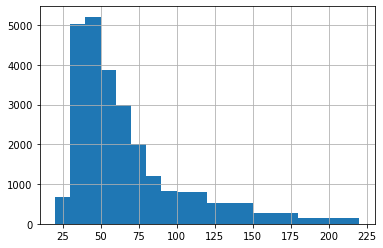

In [15]:
display(data['total_area'])
data['total_area'].unique()
data['total_area'].hist(range=(0,150),bins=[20,30,40,50,60,70,80,90,100,120,150,180,220])

#data['total_area'].median() #52.0
#data['total_area'].mean() #60.3
#data['total_area'].max() #900
#data['total_area'].min() #12

В среднем жилая площадь варьируется от 25 до 70 кв.м.
Максимальные значение 900, а минимальное 12
График похож на экспоненциальное понижение
Среднее = 60,3
Медиана = 52,0

0        51.0
1        18.6
2        34.3
3         NaN
4        32.0
         ... 
23694    73.3
23695    38.0
23696    29.7
23697     NaN
23698    12.3
Name: living_area, Length: 23699, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)
30.0
34.45785242760111
409.7
2.0


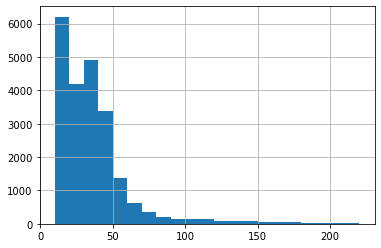

In [16]:
aib = 'living_area'
display(data[aib])
data[aib].unique()
print(data[aib].hist(range=(0,110),bins=[10,20,30,40,50,60,70,80,90,100,120,150,180,220]))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5
print(data[aib].max()) #409
print(data[aib].min()) #2


В среднем жилая площадь варьируется от 
Максимальные значение 409, а минимальное 2 (как так можно??)
График похож на экспоненциальное понижение или распределение Пуассона

Среднее = 34,5
Медиана = 30
Разброс здесь ниже
А у дома(-ов) по 900 + кв. метров около половины площади "не живая"

0        25.00
1        11.00
2         8.30
3          NaN
4        41.00
         ...  
23694    13.83
23695     8.50
23696      NaN
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23699, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)
9.1
10.569807198543522
112.0
1.3


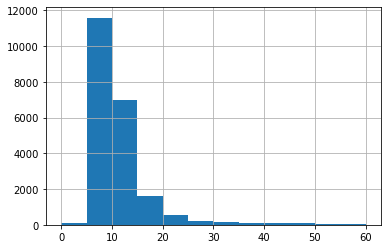

In [17]:
aib = 'kitchen_area'
display(data[aib])
data[aib].unique()
print(data[aib].hist(bins=[0,5,10,15,20,25,30,35,40,50,60]))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5
print(data[aib].max()) #409
print(data[aib].min()) #2

У кого-то в кухне помещается 1 плита и то с трудом...., но в среднем по кухне можно погулять, целых 10 кв. метров! А кто-то устраивает ресторан в 1 жилое помещение 100 квадратов

0        13000000.0
1         3350000.0
2         5196000.0
3        64900000.0
4        10000000.0
            ...    
23694     9700000.0
23695     3100000.0
23696     2500000.0
23697    11475000.0
23698     1350000.0
Name: last_price, Length: 23699, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)
4650000.0
6541553.400860796
763000000.0
121900.0


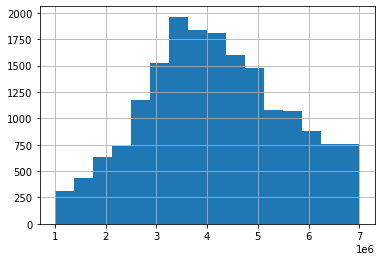

In [18]:
aib = 'last_price'
display(data[aib])
print(data[aib].hist(bins=16, range= (1000000,7000000)))#№,bins=[0,5,10,15,20,25,30,35,40,50,60]))

print(data[aib].median()) #4650000.0
print(data[aib].mean()) #6541548.771551542
print(data[aib].max()) #763000000.0
print(data[aib].min()) #12190.0

Половина стоимости квартир не дорогая, всего около 2-х месячных зарплат ректора Финансового университета, а с медианой надо целый квартал экономить)

Ну а за 12 тысяч можно и в 2-х квадратах пожить, если недалеко от метро...

А 763 миллиона кухня-ресторан звучит неплохо

0        3
1        1
2        2
3        3
4        2
        ..
23694    3
23695    3
23696    2
23697    2
23698    1
Name: rooms, Length: 23699, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)
2.0
2.070635891809781
19
0


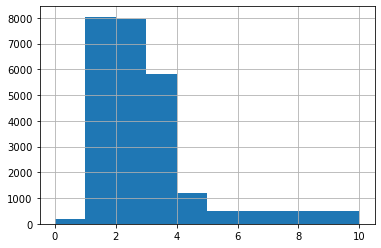

In [19]:
aib = 'rooms'
display(data[aib])
data[aib].unique()
print(data[aib].hist(bins=[0,1,2,3,4,5,10]))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5
print(data[aib].max()) #409
print(data[aib].min()) #2

У кого-то вообще нет комнат, ну а в среднем хотя-бы 2 у всех имеются и это замечательно!

0        2.70
1         NaN
2         NaN
3         NaN
4        3.03
         ... 
23694    3.70
23695     NaN
23696     NaN
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)
2.65
2.728814120242636
14.0
1.0


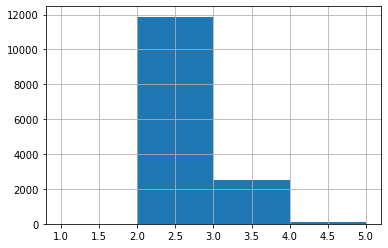

In [20]:
aib = 'ceiling_height'
display(data[aib])
data[aib].unique()
print(data[aib].hist(bins=[1,2,3,4,5]))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5
print(data[aib].max()) #409
print(data[aib].min()) #2

В среднем помещаюсь я и еще 70 сантиметров, маленького ребёнка таскать можно)
14 метров максимадьно: 2 варианта 1) человек перепутал( я изменял только те потолки где более 15 метров. так как >1,5 метра не может быть), 2е он живёт в Загсе

0         8
1         1
2         4
3         9
4        13
         ..
23694     3
23695     4
23696     1
23697    12
23698     1
Name: floor, Length: 23699, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)
4.0
5.892358327355584
33
1


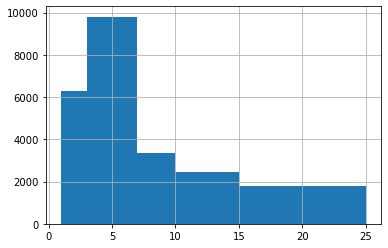

In [21]:
aib = 'floor'
display(data[aib])
data[aib].unique()
print(data[aib].hist(bins=[1,3,7,10,15,25]))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5
print(data[aib].max()) #409
print(data[aib].min()) #2

В среднем мы на 4-м - 6-м этаже, а бывают и 33

0        Другой
1        Первый
2        Другой
3        Другой
4        Другой
          ...  
23694    Другой
23695    Другой
23696    Первый
23697    Другой
23698    Первый
Name: type_floor, Length: 23699, dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


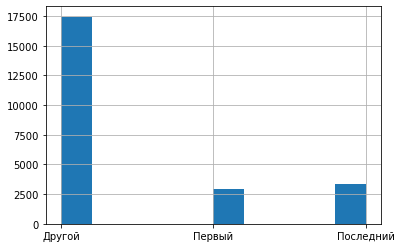

In [22]:
aib = 'type_floor'
display(data[aib])
data[aib].unique()
print(data[aib].hist())

#print(data[aib].median()) #30.0
#print(data[aib].mean()) #34.5
#print(data[aib].max()) #409
#print(data[aib].min()) #2

Последних чуть больше, ну а других много

0        16
1        11
2         5
3        14
4        14
         ..
23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, Length: 23699, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)
9.0
10.638718933288324
60
1


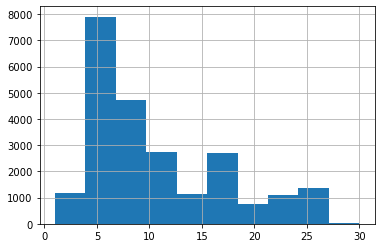

In [23]:
aib = 'floors_total'
display(data[aib])
data[aib].unique()
print(data[aib].hist(range=(1,30)))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5
print(data[aib].max()) #409
print(data[aib].min()) #2

Интересно, что в среднем мы проживаем по середине дома, так как среднее и медианное, даже максимальное отличается в 2 раза!

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: cityCenters_nearest, Length: 23699, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)
13098.5
14191.277832783278
65968.0
181.0


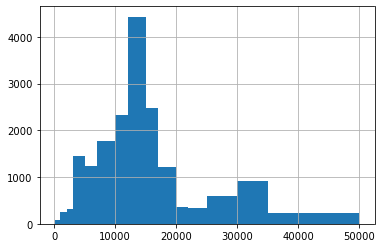

In [24]:
aib = 'cityCenters_nearest'
display(data[aib])
data[aib].unique()
print(data[aib].hist(bins=[100,1000,2000,3000,5000,7000,10000,12000,15000,17000,20000,22000,25000,30000,35000,50000]))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5
print(data[aib].max()) #409
print(data[aib].min()) #2

Вот ты и попалось! Скошенное распределение! Кому-то до города 60 км, ошибка в данных?

0        18863.0
1        12817.0
2        21741.0
3        28098.0
4        31856.0
          ...   
23694    24665.0
23695        NaN
23696        NaN
23697    39140.0
23698        NaN
Name: airports_nearest, Length: 23699, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)
26726.0
28793.67219254282
84869.0
0.0


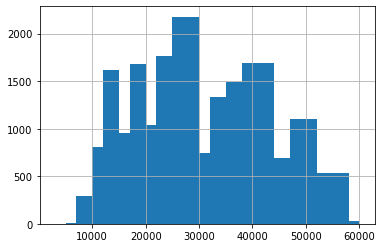

In [25]:
aib = 'airports_nearest'
display(data[aib])
data[aib].unique()
print(data[aib].hist(bins=[3000,5000,7000,10000,12000,15000,17000,20000,22000,25000,30000,32000,35000,38000,44000,47000,52000,58000,60000]))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5
print(data[aib].max()) #409
print(data[aib].min()) #2

Оказывается есть дома - прямо интегрированные в аэропорт!

0        482.0
1          NaN
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      NaN
23696      NaN
23697    173.0
23698      NaN
Name: parks_nearest, Length: 23699, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)
455.0
490.80455501918556
3190.0
1.0


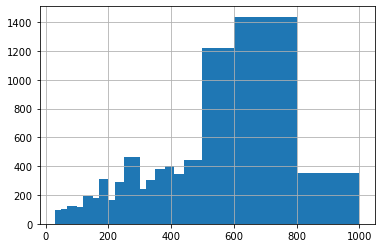

In [26]:
aib = 'parks_nearest'
display(data[aib])
data[aib].unique()
print(data[aib].hist(bins=[30,50,70,100,120,150,170,200,220,250,300,320,350,380,410,440,470,500,600,800,1000]))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5
print(data[aib].max()) #409
print(data[aib].min()) #2

парки очень близки! 0,5 км и ты на свежем воздухе!

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 23699, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)
6.0
6.400101270095784


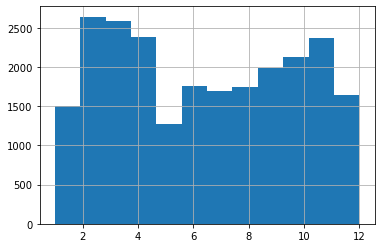

In [27]:
aib = 'month'
display(data[aib])
data[aib].unique()
print(data[aib].hist(bins=12))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5

Январские майские и декабрьские праздники! Не до обьявлений!

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: week_day, Length: 23699, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)
3.0
2.5693067218026076


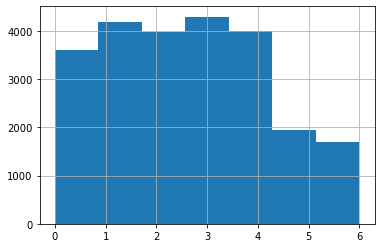

In [28]:
aib = 'week_day'
display(data[aib])
data[aib].unique()
print(data[aib].hist(bins=7))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5

В субботу и воскресенье все отдыхают, ничего не публикуют. отдых тоже нужен!)

0          NaN
1         81.0
2        558.0
3        424.0
4        121.0
         ...  
23694      NaN
23695     45.0
23696      NaN
23697    602.0
23698      NaN
Name: days_exposition, Length: 23699, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
95.0
180.88863436982163
1580.0
1.0
Долгосрочники средняя:  8876492.775320139
Малосрочники средняя:  6152120.156416908
Долгосрочники медиана:  5600000.0
Малосрочники медиана:  4500000.0
Значение p 1.1775709460217121e-08
Нулевая гипотеза не права, они в среднем не дороже


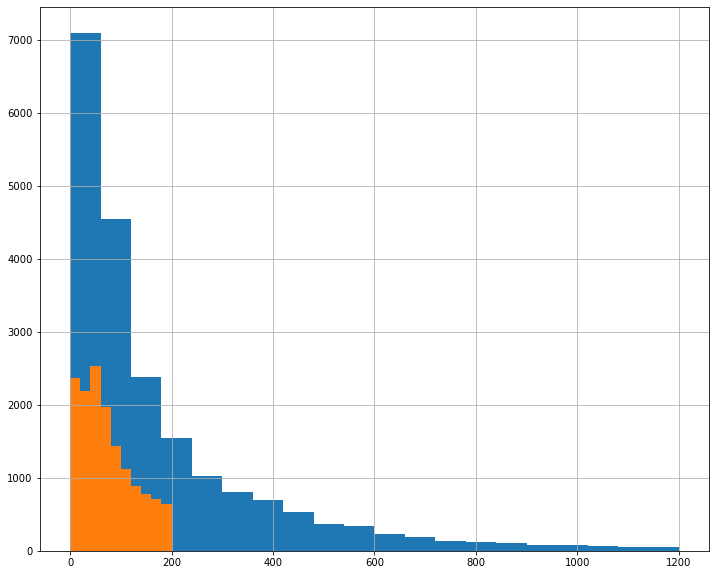

In [29]:
from scipy import stats as st
#Перейдём к продолжительности продажи
aib = 'days_exposition'
display(data[aib])
data[aib].unique()
print(data[aib].hist(bins=20, range=(0,1200)))


print(data[aib].hist(bins=10, range=(0,200),figsize=(12,10)))

print(data[aib].median()) #30.0
print(data[aib].mean()) #34.5
print(data[aib].max()) #409
print(data[aib].min()) #1

dolgo = data[data[aib] > 700]
korotko = data[data[aib] < 700]

print("Долгосрочники средняя: ", dolgo['last_price'].mean())
print("Малосрочники средняя: ", korotko['last_price'].mean())

print("Долгосрочники медиана: ", dolgo['last_price'].median())
print("Малосрочники медиана: ", korotko['last_price'].median())

result = st.ttest_ind(dolgo['last_price'], korotko['last_price'], equal_var=False)
alpha = 0.01
print("Значение p",result.pvalue)
if result.pvalue > alpha:
    print('Нулевая гипотеза права, они в среднем дороже')
else:
    print('Нулевая гипотеза не права, они в среднем не дороже')

В среднем люди продают квартиры по полгода, но половина объявлений продана за 3 квартала. Это все из-за квартир, которые не продавались очень долго ( некотороые более 4-х лет!). 

Также можно заметить, что квартиры, продающиеся более 2-х лет, стоят дороже на 1-2 миллиона рублей. Проверим это на статистике 

H0 -> цены не различаются

Н1 -> цены различаются

По уровню значимости a=0.01 делаем вывод, что цены различаются

Похоже на Пуасоновское распределение 

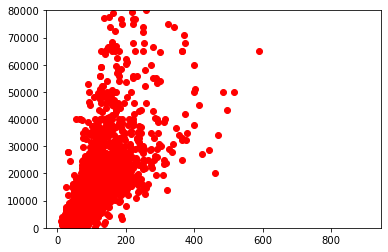

Корреляция 0.6536758035157455


In [104]:
data['price_1000'] = data['last_price'] / 1000

#Зависимость от стоимости
from matplotlib import pyplot as plt
pokazat = 'total_area'
price = 'price_1000'

#print(data.plot(x=pokazat, y=price, kind ='hist'))
plt.plot(data[pokazat], data[price], 'ro')
plt.ylim(0,80000)
#plt.xlim(0,400)
plt.show()

print('Корреляция', data[pokazat].corr(data[price]))

Делю на 1000, чтобы помещались цифры. 
Корреляция между полной площадь и ценой достаточно высокая

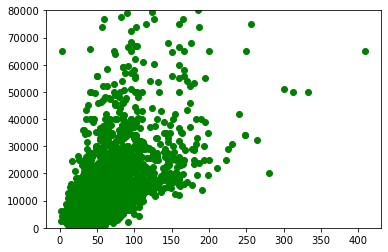

Корреляция 0.5664916373955454


In [31]:
#Зависимость жилой площади от стоимости
from matplotlib import pyplot as plt
pokazat = 'living_area'
price = 'price_1000'

#print(data.plot(x=pokazat, y=price, kind ='hist'))
plt.plot(data[pokazat], data[price], 'ro', color= 'green')
plt.ylim(0,80000)
plt.show()

print('Корреляция', data[pokazat].corr(data[price]))

Корреляция между жилой площадью более высокая

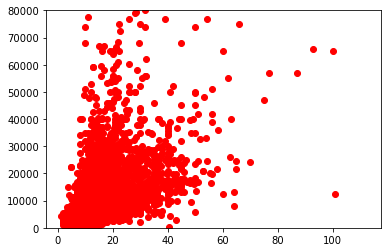

Корреляция 0.5198718641583201


In [32]:
#Зависимость от стоимости
from matplotlib import pyplot as plt
pokazat = 'kitchen_area'
price = 'price_1000'

#print(data.plot(x=pokazat, y=price, kind ='hist'))
plt.plot(data[pokazat], data[price], 'ro')
plt.ylim(0,80000)
plt.show()

print('Корреляция', data[pokazat].corr(data[price]))

Разброс выше, но и корреляция заметна

AxesSubplot(0.125,0.125;0.775x0.755)


,price_1000
rooms,
0,2450.0
1,3350.0
2,5196.0
3,13000.0
4,4050.0
5,15500.0
6,11795.0
7,65000.0
8,16500.0


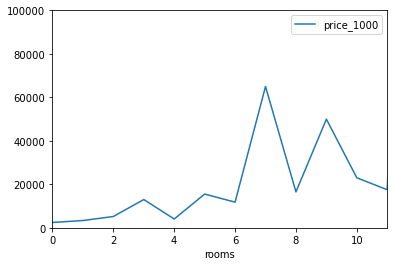

In [33]:
#Зависимость от стоимости
from matplotlib import pyplot as plt
pokazat = 'rooms'
price = 'price_1000'

new_data = data.pivot_table(values=price, index=pokazat, aggfunc='first')

print(new_data.plot(xlim=(0,11),ylim=(0,100000)))
new_data

В среднем цены растут, иногда падают.

Небольшая корреляция есть)

Я бы сказал корреляция очень небольшая)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


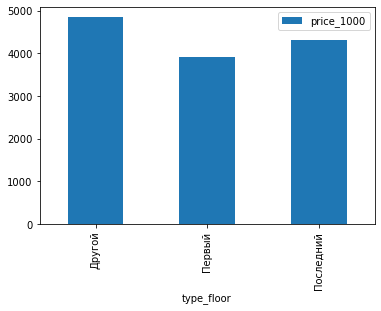

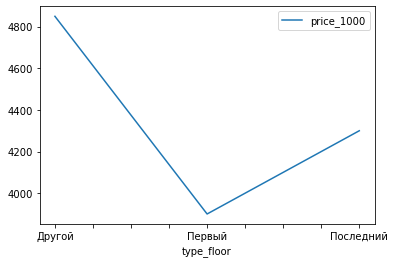

In [34]:
#Зависимость от стоимости
from matplotlib import pyplot as plt
pokazat = 'type_floor'
price = 'price_1000'

new_data = data.pivot_table(values=price, index=pokazat, aggfunc='median')
print(new_data.plot(kind='bar'))
print(new_data.plot())

На 1-м всё же дешевле, чем на остальных и на последнем)

Обновленно, все живут везде! Не особо важно какой тип этажа!

AxesSubplot(0.125,0.125;0.775x0.755)


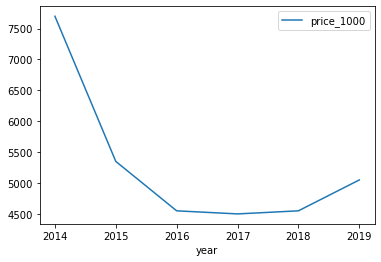

In [35]:
#Зависимость от стоимости
from matplotlib import pyplot as plt
pokazat = 'year'
price = 'price_1000'

new_data = data.pivot_table(values=price, index=pokazat, aggfunc='median')
print(new_data.plot())

Неожиданно но факт, цены уменьшаются! Ну после кризиса...

AxesSubplot(0.125,0.125;0.775x0.755)


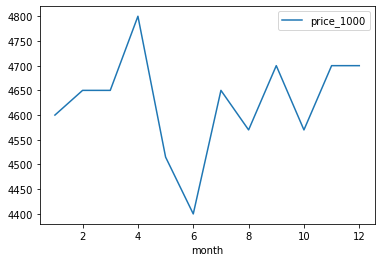

In [36]:
#Зависимость от стоимости
from matplotlib import pyplot as plt
pokazat = 'month'
price = 'price_1000'

new_data = data.pivot_table(values=price, index=pokazat, aggfunc='median')
print(new_data.plot())

Цены к лету падают (я про эту зависимость даже где-то слышал)

AxesSubplot(0.125,0.125;0.775x0.755)


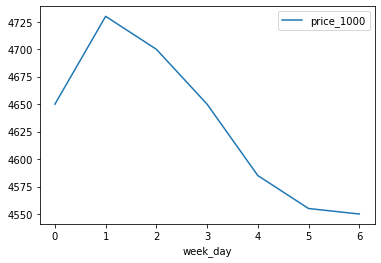

In [37]:
#Зависимость от стоимости
from matplotlib import pyplot as plt
pokazat = 'week_day'
price = 'price_1000'

new_data = data.pivot_table(values=price, index=pokazat, aggfunc='median')
print(new_data.plot())

В субботу - воскресенье дешевле, а во вторник самые дорогие

In [38]:
#обьявления
data_by_country = data.groupby('locality_name').agg(avg_price=('price/metr','mean'), count=('last_price','count'))
data_by_country.sort_values(by='count', ascending=False).head(10)

,avg_price,count
locality_name,,
Санкт-Петербург,114849.072817,15721
Мурино,86087.512050,590
Кудрово,95324.930544,472
Шушары,78677.364217,440
Всеволожск,68654.473986,398
Пушкин,103125.819291,369
Колпино,75424.579098,338
Парголово,90175.913458,327
Гатчина,68746.146763,307


Как и ожидалось Питер самый дорогой, но остальные не так сильно и отстают!

<AxesSubplot:xlabel='km'>

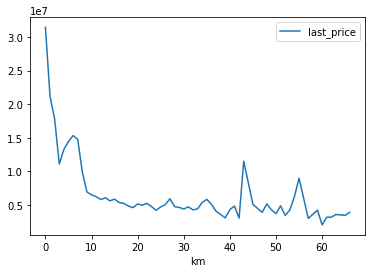

In [39]:
#SPB
'''data_by_SPB = data[data['locality_name'] == 'Санкт-Петербург']
new_data = data_by_SPB['last_price']/data_by_SPB['km']
print(new_data.sum()/new_data.count())
print(new_data.sum())
print(new_data.count())
#new'''

new_data = data.pivot_table(index='km',values='last_price',aggfunc='mean')
new_data.plot()


Видно быстрое уменьшение цены, сначало резкое потом плавное и остановка.

Каждый километр до города стоит дороже, чем 9 кв. метр в самом доме

### Общий вывод

Было исправленно очень много человеческих(например потолок 25 метров, на 2.5)

Были сделаны следующие выводы:
1) На основании статистического анализа было выявлено, что чем дороже квартира, тем дольше она продаётся

2) Средняя цена километра отдаленности от центра 1,5 миллиона

3) В воскресенье выставляется мало обьявлений и большой разброс. Также, мало обьявлений выставляется в мае, январе и декабре

4) Стоимость больше всего коррелирует с площадью дома

5) Потолки в среднем около 2,5 метров

6) Виден очень большой разброс в цене, количесве квадратных метров жилой и нежилой площади

7) В среднем все живут на 4-6 этажах, а первый этаж не особо любят богачи или он предназначен для другого помещения

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод

In [40]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
first_name                 49
price/metr                  0
week_day                    0
month                       0
year                        0
km                       5519
type_floor                  0
floor_category              0
price_1000                  0
dtype: int64


In [41]:
data_only_piter = data.loc[data['first_name'] == 'Санкт-Петербург']
data_only_piter['price/metr'] = round(data_only_piter['price/metr']).astype('int')
#round(data_only_piter['living_area']).astype('int')
data_only_piter['living_area']

0        51.0
2        34.3
3         NaN
4        32.0
7         NaN
         ... 
23689    16.3
23690    31.0
23691    40.3
23694    73.3
23697     NaN
Name: living_area, Length: 15721, dtype: float64

Отделяем только Питер

# Предобработка данных по своему прооекту, предыдущие шаги не трогать

## Начало своей работы

In [42]:
ceil = float(round(data_only_piter.agg({'ceiling_height':'mean'}),2))
ceil

2.77

In [43]:
data_only_piter['ceiling_height'] = data_only_piter['ceiling_height'].fillna(ceil)

In [44]:
data_only_piter.isna().sum()
import numpy as np

Обрабатываем и заполняем недостатки 

# Для СПБ

<AxesSubplot:xlabel='total_images'>

,price/metr
total_images,
0,108071.955247
1,112007.385609
2,113429.950860
3,112221.735234
4,109933.884740
5,109988.789793
6,109826.172078
7,109968.012474
8,108496.463415


0.12111211549671375

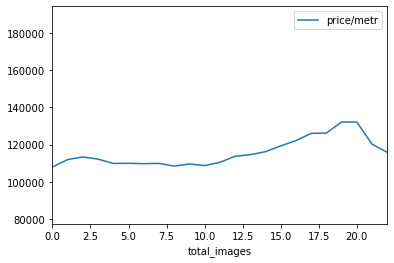

In [45]:
display(data_only_piter.groupby('total_images').agg({'price/metr':'mean'}).plot(xlim=(0,22)))
display(data_only_piter.groupby('total_images').agg({'price/metr':'mean'}))
data_only_piter['total_images'].corr(data_only_piter['price/metr'])

Проверяем корреляция с фото. Присутствует небольшая

<AxesSubplot:xlabel='total_area'>

,price/metr
total_area,
12.0,200000.000000
13.0,180769.333333
13.2,127727.000000
14.0,85000.000000
15.0,103333.000000
...,...
590.0,110169.000000
618.0,485437.000000
631.0,221870.000000


0.2945010853288701

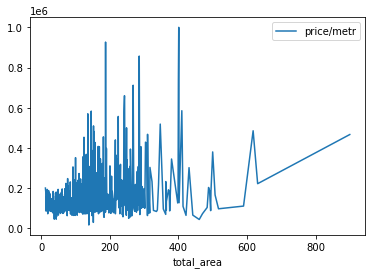

In [46]:
pokaz = 'total_area'
display(data_only_piter.groupby(pokaz).agg({'price/metr':'mean'}).plot())
display(data_only_piter.groupby(pokaz).agg({'price/metr':'mean'}))
data_only_piter[pokaz].corr(data_only_piter['price/metr'])

Теперь с общей площадью. Она точно есть

<AxesSubplot:xlabel='rooms'>

,price/metr
rooms,
0,123400.472727
1,115921.882520
2,112743.523893
3,111501.807907
4,120569.326446
5,134973.542955
6,144652.848485
7,166651.228070
8,191784.181818


0.04318442390572792

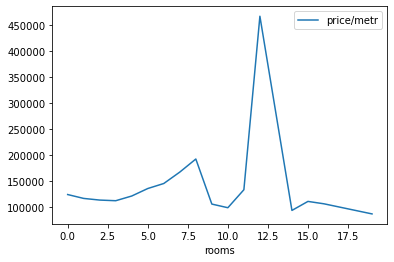

In [47]:
pokaz = 'rooms'
display(data_only_piter.groupby(pokaz).agg({'price/metr':'mean'}).plot())
display(data_only_piter.groupby(pokaz).agg({'price/metr':'mean'}))
data_only_piter[pokaz].corr(data_only_piter['price/metr'])

С количеством комнат очень небольшая

<AxesSubplot:xlabel='ceiling_height'>

,price/metr
ceiling_height,
1.00,109091.000000
1.75,102500.000000
2.00,104393.384615
2.30,89912.000000
2.40,102440.100000
...,...
8.00,83582.000000
8.30,125556.000000
10.00,600000.000000


0.24039548633325086

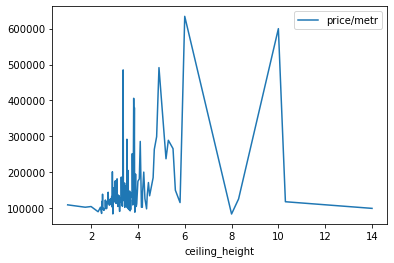

In [48]:
pokaz = 'ceiling_height'
display(data_only_piter.groupby(pokaz).agg({'price/metr':'mean'}).plot())
display(data_only_piter.groupby(pokaz).agg({'price/metr':'mean'}))
data_only_piter[pokaz].corr(data_only_piter['price/metr'])

С высотой потолков случайное

<AxesSubplot:xlabel='floors_total'>

,price/metr
floors_total,
1,109905.277778
2,105057.854167
3,109592.515695
4,121234.499227
5,106710.063675
6,134097.840782
7,148371.422222
8,182049.377622
9,101922.488985


<AxesSubplot:xlabel='floors_total'>

,last_price
floors_total,
1,7.495587e+06
2,1.120946e+07
3,1.009554e+07
4,1.125347e+07
5,7.306998e+06
6,1.381766e+07
7,1.577575e+07
8,1.951256e+07
9,5.814639e+06


-0.060702688711701605

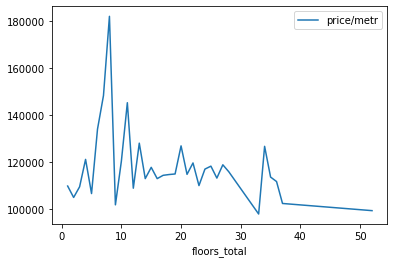

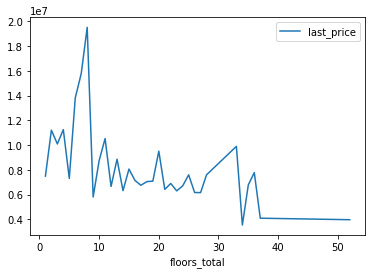

In [49]:
pokaz = 'floors_total'
display(data_only_piter.groupby(pokaz).agg({'price/metr':'mean'}).plot())
display(data_only_piter.groupby(pokaz).agg({'price/metr':'mean'}))
data_only_piter[pokaz].corr(data_only_piter['price/metr'])

pokaz = 'floors_total'
display(data_only_piter.groupby(pokaz).agg({'last_price':'mean'}).plot())
display(data_only_piter.groupby(pokaz).agg({'last_price':'mean'}))
data_only_piter[pokaz].corr(data_only_piter['last_price'])


<AxesSubplot:xlabel='living_area'>

,price/metr
living_area,
2.0,122115.0
3.0,287923.5
5.0,100213.0
6.0,122637.5
8.0,152170.5
...,...
322.0,221800.0
332.0,96712.0
348.0,184848.0


0.2218388343211534


<AxesSubplot:xlabel='living_area'>

,last_price
living_area,
2.0,6350000.0
3.0,34715000.0
5.0,4390000.0
6.0,3924500.0
8.0,5450000.0
...,...
322.0,140000000.0
332.0,50000000.0
348.0,91500000.0


0.5712379221569369

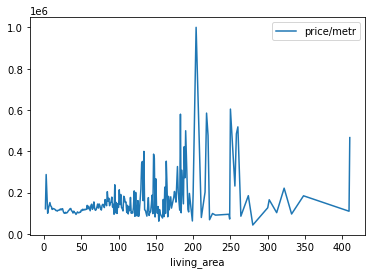

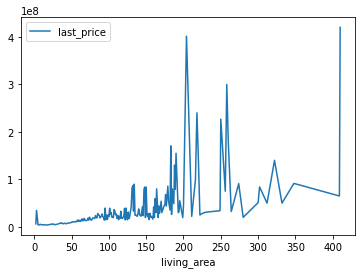

In [50]:
pokaz = 'living_area'
data_only_piter[pokaz] = round(data_only_piter[pokaz])

display(data_only_piter.groupby(pokaz).agg({'price/metr':'mean'}).plot())
display(data_only_piter.groupby(pokaz).agg({'price/metr':'mean'}))
print(data_only_piter[pokaz].corr(data_only_piter['price/metr']))


display(data_only_piter.groupby(pokaz).agg({'last_price':'mean'}).plot())
display(data_only_piter.groupby(pokaz).agg({'last_price':'mean'}))
data_only_piter[pokaz].corr(data_only_piter['last_price'])

С количеством этажей нет

<AxesSubplot:xlabel='open_plan'>

,price/metr
open_plan,
0.0,114822.663819
1.0,127402.303030


0.010949287070070894


<AxesSubplot:xlabel='open_plan'>

,last_price
open_plan,
0.0,8.064566e+06
1.0,7.087121e+06


-0.003437833335439944

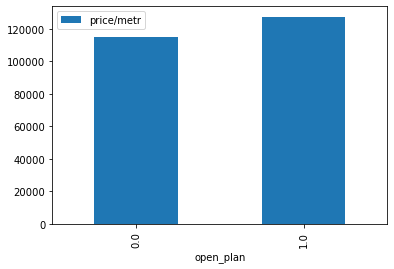

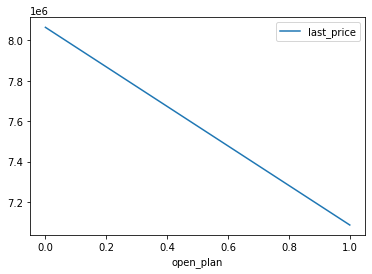

In [51]:
pokaz = 'open_plan'
data_only_piter[pokaz] = round(data_only_piter[pokaz])

display(data_only_piter.groupby(pokaz).agg({'price/metr':'mean'}).plot(kind='bar'))
display(data_only_piter.groupby(pokaz).agg({'price/metr':'mean'}))
print(data_only_piter[pokaz].corr(data_only_piter['price/metr']))


display(data_only_piter.groupby(pokaz).agg({'last_price':'mean'}).plot())
display(data_only_piter.groupby(pokaz).agg({'last_price':'mean'}))
data_only_piter[pokaz].corr(data_only_piter['last_price'])

Открытый план чуть дороже, как и написано в интернете

<AxesSubplot:xlabel='total_area'>

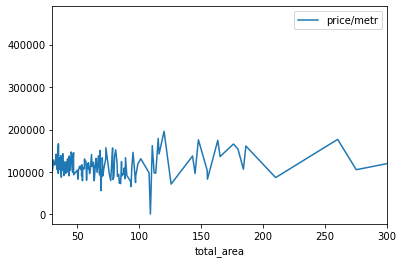

In [52]:
data_only_vishe_14 = data_only_piter.loc[((data_only_piter['floor'] == data_only_piter['floors_total']) & (data['floors_total'] > 14))]
data_only_vishe_14.groupby('total_area').agg({'price/metr':'mean'}).plot(xlim=(30,300))

Выше определенного этажа стоимость увеличивается

<AxesSubplot:xlabel='total_area'>

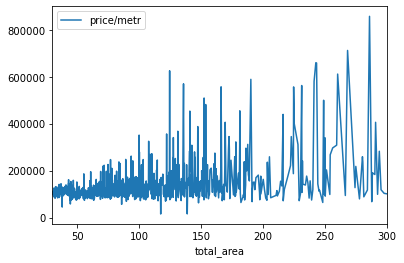

In [53]:
data_only_ne_vishe_14 = data_only_piter.loc[((data_only_piter['floor'] != data_only_piter['floors_total']) & (data['floors_total'] < 14))]
data_only_ne_vishe_14.groupby('total_area').agg({'price/metr':'mean'}).plot(xlim=(30,300))

Не выше определенного этажа

<AxesSubplot:xlabel='cityCenters_nearest'>

,price/metr
cityCenters_nearest,
181.0,195591.0
208.0,172619.0
215.0,109900.0
287.0,88796.0
291.0,101322.0
...,...
28644.0,85191.5
28806.0,79890.0
29263.0,56527.0


-0.3135387572304143


<AxesSubplot:xlabel='cityCenters_nearest'>

,last_price
cityCenters_nearest,
181.0,31099000.0
208.0,5800000.0
215.0,10990000.0
287.0,9590000.0
291.0,11500000.0
...,...
28644.0,4775000.0
28806.0,4370000.0
29263.0,4850000.0


-0.25950782129691097

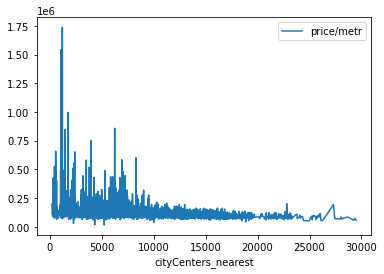

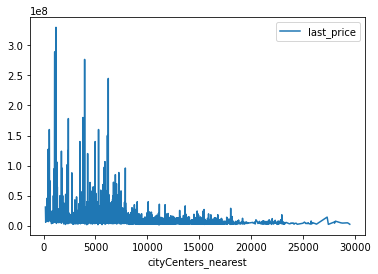

In [54]:
pokaz = 'cityCenters_nearest'
data_only_piter[pokaz] = round(data_only_piter[pokaz])

display(data_only_piter.groupby(pokaz).agg({'price/metr':'mean'}).plot())
display(data_only_piter.groupby(pokaz).agg({'price/metr':'mean'}))
print(data_only_piter[pokaz].corr(data_only_piter['price/metr']))


display(data_only_piter.groupby(pokaz).agg({'last_price':'mean'}).plot())
display(data_only_piter.groupby(pokaz).agg({'last_price':'mean'}))
data_only_piter[pokaz].corr(data_only_piter['last_price'])

Удаленность от города явно присутствует

In [55]:
pokaz = 'cityCenters_nearest'
data_only_piter['new_nearest'] = round(data_only_piter[pokaz]).rank(method='dense')
data_only_piter[['cityCenters_nearest','new_nearest']]

,cityCenters_nearest,new_nearest
0,16028.0,5429.0
2,13933.0,4398.0
3,6800.0,1734.0
4,8098.0,1980.0
7,11634.0,3216.0
...,...,...
23689,16081.0,5460.0
23690,6263.0,1626.0
23691,4489.0,977.0
23694,4232.0,868.0


Ранжируем по удаленнности от центра 

In [56]:
data_only_piter['new_nearest'].max()

6299.0

In [57]:
data_by_nearest = data_only_piter.groupby('new_nearest').agg({'cityCenters_nearest':'mean', 'price/metr':'mean'})#.corr(data_only_piter['price/metr'])
data_by_nearest['cityCenters_nearest'].corr(data_by_nearest['price/metr'])

-0.3067722824804048

Корреляция достаточно высокая

<AxesSubplot:xlabel='cityCenters_nearest'>

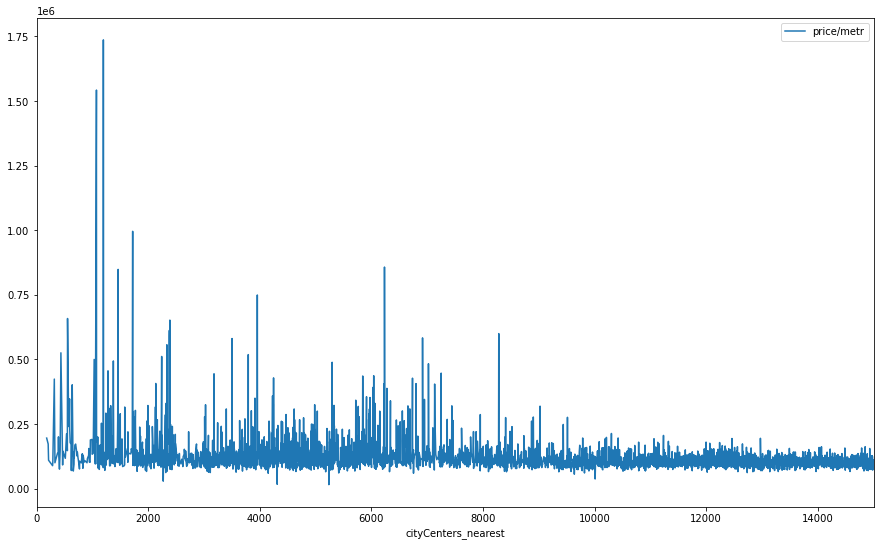

In [58]:
data_by_nearest.plot(y='price/metr',x='cityCenters_nearest', xlim=(0,15000), figsize=(15,9))

In [59]:
data_by_nearest.corr()

,cityCenters_nearest,price/metr
cityCenters_nearest,1.000000,-0.306772
price/metr,-0.306772,1.000000


Графически не особо видна

0        108.00
2         56.00
3        159.00
4        100.00
7         71.60
          ...  
23689     35.30
23690     52.00
23691     72.90
23694    133.81
23697     76.75
Name: total_area, Length: 15721, dtype: float64

<AxesSubplot:>

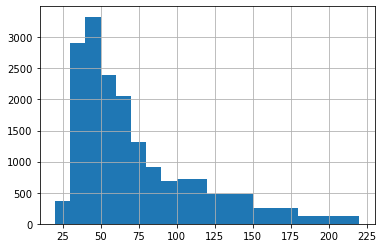

In [60]:
display(data_only_piter['total_area'])
data_only_piter['total_area'].unique()
data_only_piter['total_area'].hist(range=(0,150),bins=[20,30,40,50,60,70,80,90,100,120,150,180,220])

Общая площадь анализ

<AxesSubplot:xlabel='rooms'>

,price/metr
rooms,
0,123400.472727
1,115921.882520
2,112743.523893
3,111501.807907
4,120569.326446
5,134973.542955
6,144652.848485
7,166651.228070
8,191784.181818


0.04318442390572792


<AxesSubplot:xlabel='rooms'>

,last_price
rooms,
0,4.172441e+06
1,4.480248e+06
2,6.759946e+06
3,9.671498e+06
4,1.497981e+07
5,2.575643e+07
6,3.263766e+07
7,5.240060e+07
8,5.143545e+07


0.37237538080366284

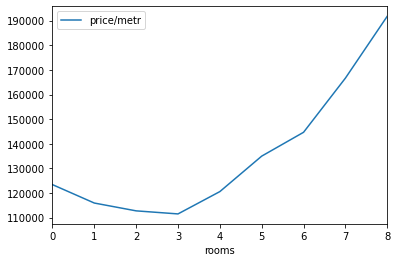

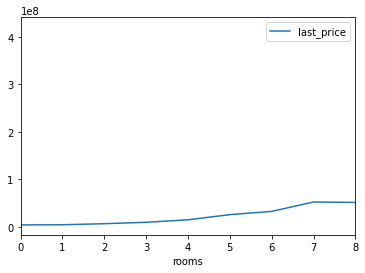

In [61]:
pokaz = 'rooms'
data_only_piter[pokaz] = round(data_only_piter[pokaz])

display(data_only_piter[data_only_piter['rooms'] < 9].groupby(pokaz).agg({'price/metr':'mean'}).plot(xlim=(0,8)))
display(data_only_piter.groupby(pokaz).agg({'price/metr':'mean'}))
print(data_only_piter[pokaz].corr(data_only_piter['price/metr']))


display(data_only_piter.groupby(pokaz).agg({'last_price':'mean'}).plot(xlim=(0,8)))
display(data_only_piter.groupby(pokaz).agg({'last_price':'mean'}))
data_only_piter[pokaz].corr(data_only_piter['last_price'])

При увеличении количества комнат

<AxesSubplot:xlabel='total_area'>

,price/metr
total_area,
12.0,200000.00
13.0,167508.75
14.0,85000.00
15.0,103333.00
16.0,144657.50
...,...
517.0,96712.00
590.0,110169.00
618.0,485437.00


0.2945473781677129


<AxesSubplot:xlabel='total_area'>

,last_price
total_area,
12.0,2400000.0
13.0,2184000.0
14.0,1190000.0
15.0,1550000.0
16.0,2275000.0
...,...
517.0,50000000.0
590.0,65000000.0
618.0,300000000.0


0.6572021405839148

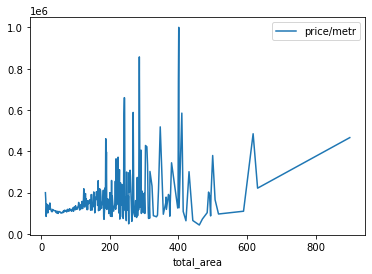

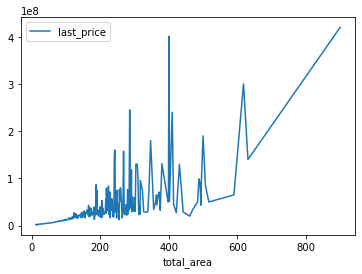

In [62]:
pokaz = 'total_area'
data_only_piter[pokaz] = round(data_only_piter[pokaz])

display(data_only_piter.groupby(pokaz).agg({'price/metr':'mean'}).plot())
display(data_only_piter.groupby(pokaz).agg({'price/metr':'mean'}))
print(data_only_piter[pokaz].corr(data_only_piter['price/metr']))


display(data_only_piter.groupby(pokaz).agg({'last_price':'mean'}).plot())
display(data_only_piter.groupby(pokaz).agg({'last_price':'mean'}))
data_only_piter[pokaz].corr(data_only_piter['last_price'])

При увеличении общей площади цена чуть изменяется

<AxesSubplot:xlabel='total_area'>

,price/metr
total_area,
25.0,40
26.0,32
27.0,39
28.0,61
29.0,105
...,...
517.0,1
590.0,1
618.0,1


0.2945473781677129


<AxesSubplot:xlabel='total_area'>

,last_price
total_area,
12.0,1
13.0,4
14.0,1
15.0,1
16.0,2
...,...
517.0,1
590.0,1
618.0,1


0.6572021405839148

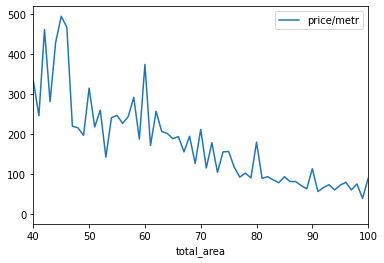

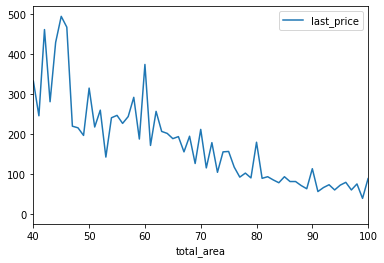

In [63]:
pokaz = 'total_area'
data_only_piter[pokaz] = round(data_only_piter[pokaz])

display(data_only_piter[data_only_piter['total_area'] > 24].groupby(pokaz).agg({'price/metr':'count'}).plot(xlim=(40,100)))
display(data_only_piter[data_only_piter['total_area'] > 24].groupby(pokaz).agg({'price/metr':'count'}))
print(data_only_piter[pokaz].corr(data_only_piter['price/metr']))


display(data_only_piter.groupby(pokaz).agg({'last_price':'count'}).plot(xlim=(40,100)))
display(data_only_piter.groupby(pokaz).agg({'last_price':'count'}))
data_only_piter[pokaz].corr(data_only_piter['last_price'])

А точнее уменьшается

# Калькулятор для СПБ

## Конечный вариант калькулятора

In [91]:
def calculator(mas, total_area, rooms, floor=5, floors_total=7, open_plan = 0, 
               total_images = 5, cityCenters_nearest = 1000, 
               remont=False, kitchen_area=10, photo = 5):
    price_for_metr = mas.query('total_area + 5 > @total_area and total_area - 5 < @total_area')['price/metr'].mean()
    price_for_nearest = mas.query('cityCenters_nearest*1.1> @cityCenters_nearest and cityCenters_nearest*0.9 \
                                   < @cityCenters_nearest')['price/metr'].mean()
    
    if price_for_nearest is np.nan:
        price_for_nearest = mas.query('abs(cityCenters_nearest)*1.1+100> @cityCenters_nearest and \
                                      abs(cityCenters_nearest)*0.9-100 \
                                   < @cityCenters_nearest')['price/metr'].mean()
    price_for_metr = (price_for_metr + price_for_nearest)/2
    if floor == 1:
        price_for_metr *= 0.94
    elif floor == floors_total:
        if floor < 15:
            price_for_metr *= 0.97
        elif floor < 25:
            price_for_metr *= 1.01
        else:
            price_for_metr *= 1.05
            
    if open_plan:
        price_for_metr *= 1.07
    if remont:
        price_for_metr *= 1.12
    if kitchen_area > 1/3*total_area or kitchen_area > 20:
        price_for_metr *= 1.035

    if photo < 5:
        price_for_metr *= 0.98
    elif photo < 15:   
        price_for_metr *= 1.01
    else:
        price_for_metr *= 1.025
    return round(price_for_metr*total_area*1.34)

total_area = int(input('Введите общую площадь: '))
rooms = int(input('Введите количество комнат: '))
floor = int(input('Введите этаж проживания: '))
floors_total = int(input('Введите количество этажей: '))
open_plan = 1 if input('Квартира с открытым планом? Да/Нет/Не знаю: ') == 'Да' else 0
total_images = int(input('Введите количество фотографий: '))
cityCenters_nearest = int(input('Введите отдаленность от центра Санкт-Петербурга в метрах: '))
remont = True if input('Сделан ли ремонт? Да/Нет: ') == "Да" else False


print("Ваша квартира оценивается в ",
      calculator(mas=data_only_piter, total_area=total_area, 
                 rooms=rooms, floor=floor, floors_total=floors_total, 
                 open_plan = open_plan, total_images = total_images, 
                 cityCenters_nearest = cityCenters_nearest,
                remont = remont, photo=total_images), "рублей")


Введите общую площадь: 55
Введите количество комнат: 2
Введите этаж проживания: 12
Введите количество этажей: 21
Квартира с открытым планом? Да/Нет/Не знаю: Да
Введите количество фотографий: 4
Введите отдаленность от центра Санкт-Петербурга в метрах: 12000
Сделан ли ремонт? Да/Нет: Нет
Ваша квартира оценивается в  9281715 рублей


# Калькулятор для Москвы

In [65]:
moscow_dt = pd.read_csv('C:/Users/Bulat/Desktop/Недвижимость!/Данные по Москве/rent_apartment_moscow_2.csv')

In [66]:
moscow_dt

,id,metro,price,minutes,way,provider,fee_percent,views,storey,storeys,rooms,total_area,living_area,kitchen_area
0,0,Akademicheskaia,95000,10,walk,agency,0,36,7.0,25.0,3,120.000000,53.000000,17.000000
1,1,Dmitrovskaia,38000,10,walk,realtor,50,26,7.0,9.0,1,34.000000,18.000000,12.000000
2,2,Novye Cheremushki,70000,5,walk,agency,50,663,9.0,17.0,2,60.000000,32.000000,12.000000
3,3,Krasnopresnenskaia,100000,3,walk,realtor,0,2192,5.0,5.0,3,74.000000,30.000000,30.000000
4,4,Domodedovskaia,73000,17,walk,agency,40,92,10.0,14.0,3,71.000000,60.000000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8193,8193,No data,450000,0,walk,agency,0,119,3.0,5.0,5,67.181777,67.181777,67.181777
8194,8194,No data,200000,0,walk,agency,0,81,30.0,86.0,2,67.181777,67.181777,67.181777
8195,8195,No data,179000,0,walk,agency,0,56,18.0,22.0,3,67.181777,67.181777,67.181777
8196,8196,No data,390000,0,walk,agency,0,32,16.0,19.0,3,67.181777,67.181777,67.181777


In [67]:
moscow_dt[moscow_dt['metro'] != 'No data'].groupby('metro').agg({'id':'count'}).mean()

id    26.347222
dtype: float64

In [68]:
moscow_dt = moscow_dt[moscow_dt['metro'] != 'No data']

In [69]:
moscow_dt['metro'].unique()

array([' Akademicheskaia ', ' Dmitrovskaia ', ' Novye Cheremushki ',
       ' Krasnopresnenskaia ', ' Domodedovskaia ', ' Taganskaia ',
       ' Sukharevskaia ', ' Mitino ', ' Govorovo ', ' Baumanskaia ',
       ' Michurinskii prospekt ', ' Khovrino ', ' Planernaia ',
       ' Riazanskii prospekt ', ' VDNKh ', ' Medvedkovo ',
       ' Babushkinskaia ', ' Preobrazhenskaia ploshchad ', ' Liublino ',
       ' Ulitca 1905 goda ', ' Pionerskaia ', ' Skhodnenskaia ',
       ' Petrovskii park ', ' Altufevo ', ' Izmailovskaia ', ' Vykhino ',
       ' Molodezhnaia ', ' Tushinskaia ', ' Vodnyi stadion ',
       ' Alekseevskaia ', ' Sviblovo ', ' Rimskaia ', ' Okskaia ',
       ' Voikovskaia ', ' Rasskazovka ', ' Okhotnyi riad ', ' Solntcevo ',
       ' Piatnitckoe shosse ', ' Semenovskaia ', ' Kuzminki ',
       ' Kaluzhskaia ', ' Botanicheskii sad ', ' Kantemirovskaia ',
       ' Bibirevo ', ' Oktiabrskoe pole ', ' Smolenskaia ',
       ' Mezhdunarodnaia ', ' Kolomenskaia ', ' Ramenki ',
      

In [70]:
moscow_dt.groupby('metro').agg({'price':'mean'}).sort_values(by='price')

,price
metro,
Kotelniki,2.400000e+04
Lermontovskii prospekt,3.040000e+04
Shchelkovskaia,3.375000e+04
Teplyi Stan,3.464286e+04
Bittcevskii park,3.500000e+04
...,...
Lubianka,4.150000e+05
Trubnaia,4.422863e+05
Pushkinskaia,5.245287e+05


In [77]:
#moscow_dt['price'] = moscow_dt['price']*12/0.08
moscow_dt['price']
moscow_dt

,id,metro,price,minutes,way,provider,fee_percent,views,storey,storeys,rooms,total_area,living_area,kitchen_area,price/metr
0,0,Akademicheskaia,14250000.0,10,walk,agency,0,36,7.0,25.0,3,120.000000,53.000000,17.000000,791.666667
1,1,Dmitrovskaia,5700000.0,10,walk,realtor,50,26,7.0,9.0,1,34.000000,18.000000,12.000000,1117.647059
2,2,Novye Cheremushki,10500000.0,5,walk,agency,50,663,9.0,17.0,2,60.000000,32.000000,12.000000,1166.666667
3,3,Krasnopresnenskaia,15000000.0,3,walk,realtor,0,2192,5.0,5.0,3,74.000000,30.000000,30.000000,1351.351351
4,4,Domodedovskaia,10950000.0,17,walk,agency,40,92,10.0,14.0,3,71.000000,60.000000,10.000000,1028.169014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,Oktiabrskoe pole,7350000.0,10,walk,owner,0,1,2.0,5.0,2,67.181777,67.181777,67.181777,729.364452
8130,8130,Otradnoe,7500000.0,17,walk,agency,0,3,5.0,12.0,2,67.181777,67.181777,67.181777,744.249441
8139,8139,Tretiakovskaia,43500000.0,1,walk,agency,0,3,5.0,8.0,3,67.181777,67.181777,67.181777,4316.646755
8143,8143,Perovo,7350000.0,19,walk,agency,0,2,1.0,8.0,1,67.181777,67.181777,67.181777,729.364452


In [78]:
moscow_dt['price/metr'] = moscow_dt['price']/moscow_dt['total_area']
moscow_dt['price/metr']

0       118750.000000
1       167647.058824
2       175000.000000
3       202702.702703
4       154225.352113
            ...      
8119    109404.667755
8130    111637.416076
8139    647497.013243
8143    109404.667755
8150    100473.674469
Name: price/metr, Length: 5691, dtype: float64

In [80]:
moscow_dt

,id,metro,price,minutes,way,provider,fee_percent,views,storey,storeys,rooms,total_area,living_area,kitchen_area,price/metr
0,0,Akademicheskaia,14250000.0,10,walk,agency,0,36,7.0,25.0,3,120.000000,53.000000,17.000000,118750.000000
1,1,Dmitrovskaia,5700000.0,10,walk,realtor,50,26,7.0,9.0,1,34.000000,18.000000,12.000000,167647.058824
2,2,Novye Cheremushki,10500000.0,5,walk,agency,50,663,9.0,17.0,2,60.000000,32.000000,12.000000,175000.000000
3,3,Krasnopresnenskaia,15000000.0,3,walk,realtor,0,2192,5.0,5.0,3,74.000000,30.000000,30.000000,202702.702703
4,4,Domodedovskaia,10950000.0,17,walk,agency,40,92,10.0,14.0,3,71.000000,60.000000,10.000000,154225.352113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,Oktiabrskoe pole,7350000.0,10,walk,owner,0,1,2.0,5.0,2,67.181777,67.181777,67.181777,109404.667755
8130,8130,Otradnoe,7500000.0,17,walk,agency,0,3,5.0,12.0,2,67.181777,67.181777,67.181777,111637.416076
8139,8139,Tretiakovskaia,43500000.0,1,walk,agency,0,3,5.0,8.0,3,67.181777,67.181777,67.181777,647497.013243
8143,8143,Perovo,7350000.0,19,walk,agency,0,2,1.0,8.0,1,67.181777,67.181777,67.181777,109404.667755


In [98]:
def calculator_Moscow(mas, total_area, rooms, floor=5, floors_total=7, open_plan = 0, 
               total_images = 5, minutes = 10, metro = '' ,
               remont=False, kitchen_area=10, photo = 5):
    price_for_metr = mas.query('total_area + 5 > @total_area and total_area - 5 < @total_area')['price/metr'].mean()
    
    price_for_nearest = mas.query('minutes + 2> @minutes and minutes - 2 < @minutes')['price/metr'].mean()
    
    price_for_metro = mas.query('metro == @metro')['price/metr'].mean()
    
    if price_for_nearest is np.nan:
        price_for_nearest = mas.query('abs(minutes)*1.1+2> @minutes and \
                                      abs(minutes)*0.9-2 \
                                   < @minutes')['price/metr'].mean()
        
    price_for_metr = (price_for_metr + price_for_nearest + price_for_metro)/3
    if floor == 1:
        price_for_metr *= 0.94
    elif floor == floors_total:
        if floor < 15:
            price_for_metr *= 0.97
        elif floor < 25:
            price_for_metr *= 1.01
        else:
            price_for_metr *= 1.05
    else:
        if 15 < floor < 25:
            price_for_metr *= 1.01
        else:
            price_for_metr *= 1.05
    if open_plan:
        price_for_metr *= 1.07
        
    if remont:
        price_for_metr *= 1.12
    else:
        price_for_metr *= 0.99
    if kitchen_area > 1/3*total_area or kitchen_area > 20:
        price_for_metr *= 1.035
    if photo < 5:
        price_for_metr *= 0.98
    elif photo < 15:   
        price_for_metr *= 1.01
    else:
        price_for_metr *= 1.025
    return round(price_for_metr*total_area*1.31)

total_area = int(input('Введите общую площадь: '))
rooms = int(input('Введите количество комнат: '))
floor = int(input('Введите этаж проживания: '))
floors_total = int(input('Введите количество этажей: '))
open_plan = 1 if input('Квартира с открытым планом? Да/Нет/Не знаю: ') == 'Да' else 0
total_images = int(input('Введите количество фотографий: '))
minutes = int(input('Введите отдаленность от ближайшего метро в минутах: '))
metro = input('Введите название ближайшего метро: ')
remont = True if input('Сделан ли ремонт? Да/Нет: ') == 'Да' else False


print("Ваша квартира оценивается в ",
      calculator_Moscow(mas=moscow_dt, total_area=total_area, 
                 rooms=rooms, floor=floor, floors_total=floors_total, 
                 open_plan = open_plan, total_images = total_images,
                 minutes = 10, metro = metro, remont = remont, photo = total_images), "рублей")


Введите общую площадь: 55
Введите количество комнат: 2
Введите этаж проживания: 12
Введите количество этажей: 21
Квартира с открытым планом? Да/Нет/Не знаю: Нет
Введите количество фотографий: 4
Введите отдаленность от ближайшего метро в минутах: 10
Введите название ближайшего метро:  Oktiabrskoe pole 
Сделан ли ремонт? Да/Нет: Нет
Ваша квартира оценивается в  19057631 рублей
